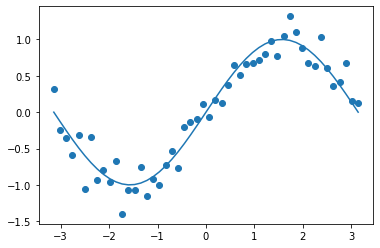

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')


def sin_with_white_noise(x, seed=1):
  """
  mean: mu = 0.0
  variance: sigma^2 = (0.2)^2 = 0.04
  """
  np.random.seed(seed=seed)
  mu = 0.0
  sigma = 0.2
  white_noise = np.random.normal(mu, sigma, len(x))
  return np.sin(x) + white_noise

x = np.linspace(-1, 1) * np.pi
y = sin_with_white_noise(x)
plt.scatter(x, y)
plt.plot(x, np.sin(x))

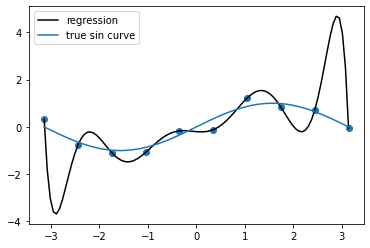

In [5]:
# Regression problem
# Maximal likelihood method

def param_estimator(cfunc, expression, target, ridge=0.0):
  row, column = len(cfunc), len(expression)
  unit_matrix = np.eye(row)
  design_matrix = np.empty([row, column])
  for i, func in enumerate(cfunc):
    for j, x in enumerate(expression):
      design_matrix[i][j] = func(x)

  inverse = np.linalg.inv( design_matrix @ design_matrix.T + ridge * unit_matrix )
  return inverse @ design_matrix @ target


def prediction(cfunc, x, param):
  phi = np.empty([len(cfunc), len(x)])
  for i, func in enumerate(cfunc):
    for j, _x in enumerate(x):
      phi[i][j] = func(_x)

  return param @ phi



N = 10 # Highest order of polynominal 
M = 10 # Number of Data

cfunc = [ (lambda n: lambda x: x ** n)(n) for n in range(M) ]
expression = np.linspace(-1, 1, N) * np.pi
target = sin_with_white_noise(expression)
w = param_estimator(cfunc, expression, target)

x = np.linspace(-1, 1, 100) * np.pi
y = prediction(cfunc, x, w)

plt.plot(x, y, c="black", label="regression")
plt.scatter(expression, target,)
plt.plot(x, np.sin(x), label="true sin curve")
# plt.ylim(-1.2, 1.2)
plt.legend()
plt.show()

正則化項を加えて0次から9次までの多項式でフィッティングを行う。

次数が大きくオーバーフィッティングしているところも正則化項によって振動が抑えられていることがわかる。一方で正則化項が強すぎると予言能力は下がることが見て取れる。

これはモデルの最適な複雑さ（多項式の例では次数）を選ぶことと正則化項の適切なパラメータを選ぶことが本質的には同じことを言っていることを示している。

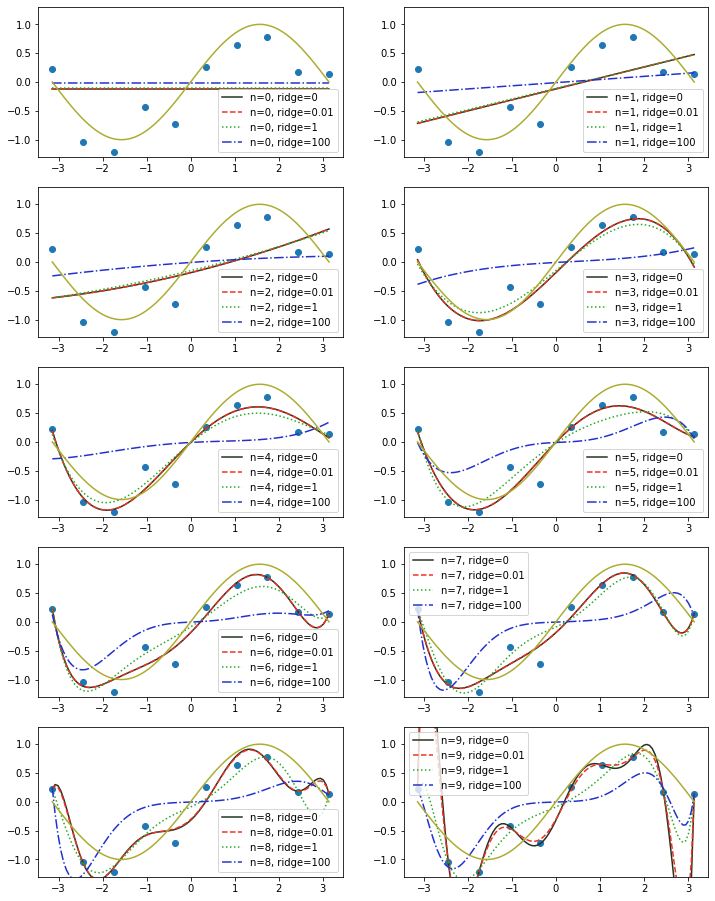

In [6]:
# fitting by polynominal function

model = [i for i in range(10)]
fig = plt.figure(figsize=(12, 16))

for n, order in enumerate(model):
  ax = fig.add_subplot(5, 2, n+1)
  N = 10
  cfunc = [ (lambda n: lambda x: x ** n)(n) for n in range(order+1) ]
  expression = np.linspace(-1, 1, N) * np.pi
  target = sin_with_white_noise(expression, seed=64)

  w = param_estimator(cfunc, expression, target)
  x = np.linspace(-1, 1, 100) * np.pi
  y = prediction(cfunc, x, w)

  ax.plot(x, y, c="#233122", label=f"n={order}, ridge=0")

  ridge = 0.01
  w = param_estimator(cfunc, expression, target, ridge=ridge)
  x = np.linspace(-1, 1, 100) * np.pi
  y = prediction(cfunc, x, w)

  ax.plot(x, y, c="#ed3122", label=f"n={order}, ridge={ridge}", linestyle="dashed")
  ridge = 1
  w = param_estimator(cfunc, expression, target, ridge=ridge)
  x = np.linspace(-1, 1, 100) * np.pi
  y = prediction(cfunc, x, w)

  ax.plot(x, y, c="#23a922", label=f"n={order}, ridge={ridge}", linestyle="dotted")

  ridge = 100
  w = param_estimator(cfunc, expression, target, ridge=ridge)
  x = np.linspace(-1, 1, 100) * np.pi
  y = prediction(cfunc, x, w)

  ax.plot(x, y, c="#2331cc", label=f"n={order}, ridge={ridge}", linestyle="dashdot")

  ax.scatter(expression, target)
  ax.plot(x, np.sin(x), c="#acac31")
  ax.set_ylim(-1.3, 1.3)
  ax.legend()

特徴関数としてガウシアンを選んでフィッティングを行う。
この関数のパラメータは平均$\mu$と分散$\sigma^2$である。
$$
  \phi_i(x) = \exp\Big\{-\frac{1}{2\sigma^{2}}(x - \mu_{i})^2\Big\}
$$
この例もモデルの複雑度を上げると過学習すると大きく振動するが、正則化項によってそれが抑えられていることがわかる。
一方で分散の値が適当だと正則化項がなくても精度良く予言できている（$\sigma=2$のグラフ）。

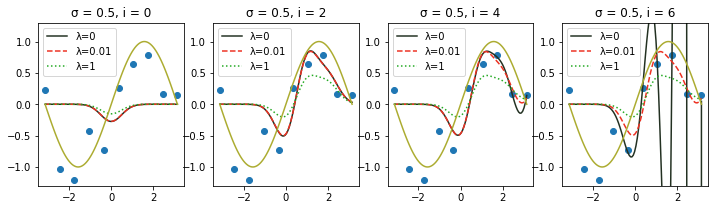

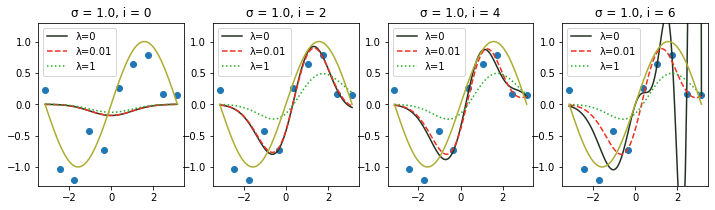

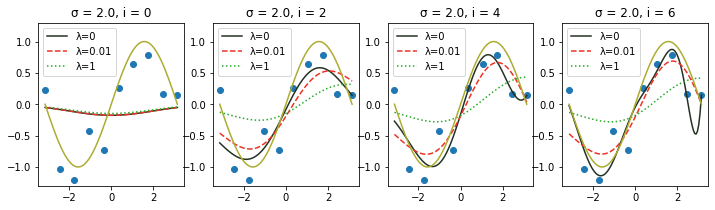

In [7]:
# fitting by Gaussian

model = [0, 1, 2, 3, 4, 5, 6]
var = [0.5, 1.0, 2.0]
# fig = plt.figure(figsize=(12, 16))


N = 10

for m, s in enumerate(var):
  fig = plt.figure(figsize=(12, 3))
  for n, order in enumerate(model):
    pos = n // 2
    if n % 2 == 0:
      ax = fig.add_subplot(1, 4, pos+1)
      cfunc = [ (lambda mu: lambda x: np.exp(-0.5 * s**(-2) * (x - mu) ** 2))(mu) for mu in range(order+1) ]
      expression = np.linspace(-1, 1, N) * np.pi
      target = sin_with_white_noise(expression, seed=64)
      
      w = param_estimator(cfunc, expression, target)
      x = np.linspace(-1, 1, 100) * np.pi
      y = prediction(cfunc, x, w)

      ax.plot(x, y, c="#233122", label=f"λ=0")

      ridge = 0.01
      w = param_estimator(cfunc, expression, target, ridge=ridge)
      x = np.linspace(-1, 1, 100) * np.pi
      y = prediction(cfunc, x, w)

      ax.plot(x, y, c="#ed3122", label=f"λ={ridge}", linestyle="dashed")
      ridge = 1
      w = param_estimator(cfunc, expression, target, ridge=ridge)
      x = np.linspace(-1, 1, 100) * np.pi
      y = prediction(cfunc, x, w)

      ax.plot(x, y, c="#23a922", label=f"λ={ridge}", linestyle="dotted")

      # ridge = 100
      # w = param_estimator(cfunc, expression, target, ridge=ridge)
      # x = np.linspace(-1, 1, 100) * np.pi
      # y = prediction(cfunc, x, w)

      # ax.plot(x, y, c="#2331cc", label=f"λ={ridge}", linestyle="dashdot")

      ax.scatter(expression, target)
      ax.plot(x, np.sin(x), c="#acac31")
      ax.set_ylim(-1.3, 1.3)
      ax.legend()
      ax.set_title(f"σ = {s}, i = {order}")
  
  # plt.show()

# Bayes linear regression

$$
    \def\Normal{\mathcal{N}}
    \def\data{\mathcal{D}}
$$

## Least square method

## Maximal likelihood estimation 

The parameters are determined to maximize the likelihood function
$$
    p(\tau | \chi, w, \beta) = \prod_{n=1}^{N} \Normal(t^{(n)} | w_{i} \phi_{i}(x^{(n)}), \beta^{-1}) 
    = \Big( \frac{\beta}{2\pi} \Big)^{N/2} \exp\Big\{ -\frac{\beta}{2} \sum_{n} (t^{(n)} - w_{i} \phi_{i}(x^{(n)}))^{2} \Big\}
$$
where $\tau = (t^{(1)}, t^{(2)}, \cdots, t^{(N)})$, $\chi = (x^{(1)}, x^{(2)}, \cdots, x^{(N)})$ are sets of the target variable and inputs $x = (x_{0}, x_{1}, \cdots, x_{d})$, $\phi_{i}(x)$ is the arbitrary function that is known the feature function, and $\beta$ is a parameter called precision which is same to the inverse of variance $\sigma^{2}$. 

The maximal likelihood estimation is one way to determine parameters $w_{i}$ due to find the maximal values.
Let us consider the negative log-likelihood function instead of ordinal one for simplicity,
$$
    f(w) \equiv -\ln p(\tau | \chi, w, \beta) = \frac{\beta}{2} \sum_{n} (t^{(n)} - w_{i} \phi_{i}(x^{(n)}))^{2} - \frac{N}{2} \ln \frac{\beta}{2\pi}
$$

## MAP estimation

Bayes theorem say that the posterior probability, which is a probability given the condition, is propotional to the likelihood function and prior probability, which is a probability not given the condition,
$$
    p(w | \tau, \chi, \alpha, \beta) = \frac{p(\tau | w, \chi, \beta) p(w | \chi, \alpha)}{\int d^{P}w p(\tau | w, \chi, \beta) p(w | \chi, \alpha)},
$$
where $P$ is a number of parameters or a dimension of parameter space.

The maximum a posterior (MAP) estimation is achieved to maximize this posterior probability.
In other words, parameters are determined by finding the maximam values of the posterior probability instead of likelihood function (maximal likelihood estimation).
If we assume zero means Gaussian as prior probability, the negative logarhythm of posterior probability is equal to
$$
    -\ln p(\tau | w, \chi, \beta) - \ln p(w | \chi, \alpha)
    = \frac{1}{2} \sum_{n} (t^{(n)} - w_{i} \phi_{i}(x^{(n)}))^{2} + \frac{1}{2} w_{i} w_{i} - \frac{N}{2} \ln \frac{\beta}{2\pi} + \frac{P}{2} \ln(2\pi) - \ln \det \alpha.
$$
$\alpha$ and $\beta$ are hyper-parameter, we focus on first two term. The optimization of this equatioin is so called Ridge regularized least square problem.

## Bayes linear regression

Assuming the Gaussian to the prior probability, the posterior probability is also Gaussian.
Actually,
$$
\begin{aligned}
    p(\tau | w, \chi, \beta) p(w | \chi, \alpha)
    &= \frac{1}{(2\pi)^{(N+P)/2}} \sqrt{\frac{1}{\det\alpha \det\beta}}
    \exp \Big\{ -\frac{1}{2} (\tau -w_{i}\Phi_{i})^{T} \beta^{-1} (\tau -w_{i}\Phi_{i})
        - \frac{1}{2} (w - m_{0})^{T} \alpha^{-1} (w - m_{0})
    \Big\}
    \\ &= \frac{1}{(2\pi)^{(N+P)/2}} \sqrt{\frac{1}{\det\alpha \det\beta}}
    \exp \Big\{ 
        - \frac{1}{2} (w - m_{N})^{T} M (w - m_{N})
        - \frac{1}{2} (N^{T} M^{-1} N - \tau^{T} \beta^{-1} \tau - m_{0}^{T} \alpha^{-1} m_{0})
    \Big\}
\end{aligned}
$$
where $\Phi_{i} = (\Phi_{i})_{n} = \phi_{i}(x^{(n)})$ is a design matrix,
$\alpha, \beta$ is the covariance matrix and
$$
\begin{aligned}
    m_{N} \equiv M^{-1} N,
    \quad M \equiv \alpha^{-1} + \Phi^{T} \beta^{-1} \Phi,
    \quad N \equiv \alpha^{-1} m_{0} + \Phi^{T} \beta^{-1} \tau.
\end{aligned}
$$
The normalization factor, $\int d^{D}w p(\tau | w, \chi, \beta) p(w | \chi, \alpha)$, is
$$
    \frac{1}{(2\pi)^{N/2}} \sqrt{\frac{\det M^{-1}}{\det \alpha \det \beta}}
    \exp\Big\{ -\frac{1}{2} (N^{T} M^{-1} N - \tau^{T} \beta^{-1} \tau - m_{0}^{T} \alpha^{-1} m_{0}) \Big\}
$$
hence the posterior probability is
$$
    p(w | \tau, \chi, \alpha, \beta) = \frac{1}{(2\pi)^{P/2}} \sqrt{\frac{1}{\det M^{-1}}}
    \exp\Big\{ -\frac{1}{2} (w - m_{N})^{T} M (w - m_{N}) \Big\}
    = \Normal(w | m_{N}, M^{-1})
$$


The predictive probability
$$
\begin{aligned}
  p(t \mid x, \tau, \chi, \alpha, \beta) 
  &= \int dw p(t \mid x, w, \beta) p(w \mid \tau, \chi, \alpha, \beta)
  \\ &= \int dw \Normal(t \mid w_{i} \Phi_{i}(x), \beta^{-1}) \Normal(w \mid m_{N}, M^{-1})
  \\ &= \int dw \frac{1}{(2\pi)^{(1+P)/2}} \sqrt{\frac{\beta}{\det M^{-1}}} \exp \Big\{
    -\frac{1}{2} (t - w_{i} \Phi_{i})^{T} \beta (t - w_{i} \Phi_{i})
    - \frac{1}{2} (w - m_{N})^{T} M (w - m_{N})
    \Big\}
\end{aligned}
$$

The expression in exponential is rewritten as follows:
$$
\begin{aligned}
  &(t - m_{N,i} \Phi_{i} - (w - m_{N})_{i} \Phi_{i})^{T} \beta (t - m_{N,i} \Phi_{i} - (w - m_{N})_{i} \Phi_{i}) + (w - m_{N})^{T} M (w - m_{N})
  \\ &= (t - m_{N,i} \Phi_{i})^{T} \beta (t - m_{N,i} \Phi_{i}) - ((w - m_{N})_{i} \Phi_{i})^{T} \beta (t - m_{N,i} \Phi_{i}) - (t - m_{N,i} \Phi_{i})^{T} \beta (w - m_{N})_{i} \Phi_{i} + (w - m_{N})^{T} (M + \Phi \beta \Phi^{T}) (w - m_{N})
  \\ &= (t - m_{N,i} \Phi_{i})^{T} \beta (t - m_{N,i} \Phi_{i}) - (w - m_{N})^{T} \tilde{N} - \tilde{N}^{T} (w - m_{N}) + (w - m_{N})^{T} \tilde{M} (w - m_{N})
  \\ &= (t - m_{N,i} \Phi_{i})^{T} \beta (t - m_{N,i} \Phi_{i}) + (w - m_{N} - \tilde{M}^{-1} \tilde{N})^{T} \tilde{M} (w - m_{N} - \tilde{M}^{-1} \tilde{N}) - \tilde{N}^{T} \tilde{M}^{-1} \tilde{N}
  \\ &= (t - m_{N,i} \Phi_{i})^{T} (\beta - \beta \Phi^{T} \tilde{M}^{-1} \Phi \beta) (t - m_{N,i} \Phi_{i}) + (w - m_{N} - \tilde{M}^{-1} \tilde{N})^{T} \tilde{M} (w - m_{N} - \tilde{M}^{-1} \tilde{N})
\end{aligned}
$$
where $\tilde{N}_{i} = \Phi_{i} \beta (t- m_{N,i} \Phi_{i})$ and $\tilde{M} = M + \Phi \beta \Phi^{T}$.

Doing the integral and apply the Woodbury formula and determinant lemma $\det(A+UWV^{T}) = \det(W^{-1} + V^{T} A^{-1} U) \det A \det W$, we obtain
$$
\begin{aligned}
  p(t \mid x, \tau, \chi, \alpha, \beta)
  &= \frac{1}{(2\pi)^{1/2}} \sqrt{\frac{\beta \det \tilde{M}^{-1}}{\det M^{-1}}} \exp\Big\{-\frac{1}{2} (t - m_{N} \Phi)^{T} (\beta - \beta \Phi^{T} \tilde{M} \Phi \beta) (t - m_{N} \Phi) \Big\}
  \\ &= \frac{1}{(2\pi)^{1/2}} \sqrt{\frac{1}{\det(\beta^{-1} + \Phi^{T} M^{-1} \Phi)}} \exp\Big\{-\frac{1}{2} (t - m_{N} \Phi)^{T} (\beta^{-1} + \Phi^{T} M^{-1} \Phi)^{-1} (t - m_{N} \Phi) \Big\}
  \\ &= \Normal(t \mid m_{N} \Phi, \sigma_{N}^{2}),
\end{aligned}
$$
where $\sigma_{N}^{2} \equiv \beta^{-1} + \Phi^{T} M^{-1} \Phi$.

In [10]:
from dataclasses import dataclass, field

@dataclass
class Train:
    inputs: list = field(default_factory=list)
    targets: list = field(default_factory=list)

train = Train()
train.inputs = [1,2,3]
train

Train(inputs=[1, 2, 3], targets=[])

In [266]:
class Distribution():
    def __init__(self):
        self.__model = None
        self.__param = None

    @property
    def model(self):
        return self.__model

    @model.setter
    def model(self, value):
        self.__model = value

    @property
    def param(self):
        return self.__param

    @param.setter
    def param(self, p):
        self.__param = p

    @property
    def mean(self):
        if self.__model == "gaussian":
            return self.__param["mean"]

    @property
    def cov(self):
        if self.__model == "gaussian":
            return self.__param["cov"]

    def normal(self, *x):
        mean = self.__param.pop("mean")
        cov = self.__param.pop("cov")
        dim = len(x)

        mean = mean * np.ones(dim) if isinstance(mean, (int, float)) else np.array(mean)
        cov = cov * np.eye(dim) if isinstance(cov, (int, float)) else np.array(cov)
        
        det_cov = np.linalg.det(cov)
        inv_cov = np.linalg.inv(cov)

        y = x - mean
        return ( 2.0 * np.pi ) ** (-dim/2) * (det_cov) ** (-1/2) * np.exp( -0.5 * y @ inv_cov @ y )
        


dist = Distribution()
dist.model = "gaussian"
dist.param = {"mean": 0, "cov": 10}
dist.mean, dist.cov


(0, 10)

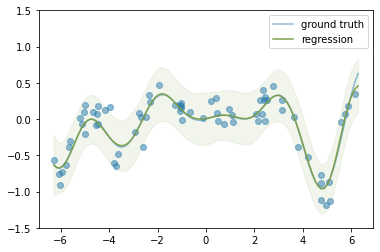

In [270]:
@dataclass
class Inference():
    # __slots__ = ('inference', 'train', '__features', '__design_matrix')
    method: str
    train: Train

    # def __post_init__(self, inference: str, train: Train):
    def __post_init__(self):
        # self.inference = inference
        # self.train = train
        self.__features = None
        self.__design_matrix = None
        self.__likelihood = Distribution()
        self.__prior_distribution = Distribution()

    @property
    def features(self):
        return self.__features

    @features.setter
    def features(self, features):
        self.__features = features
        self.__design_matrix = design_matrix(features, x)

    @property
    def design_matrix(self):
        return self.__design_matrix

    @property
    def likelihood(self):
        return self.__likelihood

    @property
    def prior_distribution(self):
        return self.__prior_distribution


def design_matrix(features, inputs):
    row, column = len(features), len(inputs)
    matrix = np.empty([row, column])
    for i, func in enumerate(features):
        for j, var in enumerate(inputs):
            matrix[i][j] = func(var)

    return matrix


class LinearRegression():
    def __init__(self, inference: Inference, **kwargs):
        self.inference = inference

    def maximal_likelihood(self):
        ...
        # return self.maximal_posterior(ridge=0)

    def maximal_posterior(self):
        unit_mat = np.eye(len(self.inference.features))
        regulator = self.inference.prior_distribution.cov
        inverse = np.linalg.inv(
            self.inference.design_matrix @ self.inference.design_matrix.T + regulator * unit_mat
        )
        param = inverse @ self.inference.design_matrix @ self.inference.train.targets
        return param

    def bayesian(self):
        unit_mat = np.eye(len(self.inference.features))
        regulator = self.inference.prior_distribution.cov
        beta = self.inference.likelihood.cov
        kern = np.linalg.inv(
            beta * self.inference.design_matrix @ self.inference.design_matrix.T + regulator * unit_mat
        )

        mean = beta * kern @ self.inference.design_matrix @ self.inference.train.targets
        return mean, kern

    def regression(self, x):
        if self.inference.method == 'ml':
            pass

        elif self.inference.method == 'map':
            w_estimated = self.maximal_posterior()
            return w_estimated @ design_matrix(self.inference.features, x)

        elif self.inference.method == 'bayesian':
            mean, kern = self.bayesian()
            predict = mean @ design_matrix(self.inference.features, x)
            variance = np.ones(len(x)) / self.inference.likelihood.cov
            for i, val in enumerate(x):
                variance[i] += design_matrix(self.inference.features, [val]).T @ kern @ design_matrix(self.inference.features, [val])

            return predict, variance

        else:
            raise ValueError("no such value")

    def plot(self, x, y, ubound=None, lbound=None, **kwargs):
        import matplotlib.pyplot as plt
        return plt.plot(x, y)


if __name__ == '__main__':

    np.random.seed(seed=1)
    # x = 2*np.pi*np.linspace(-1, 1)
    x = 2.0 * np.pi * np.sort(2*np.random.rand(72)-1)
    # y = np.sin(x) + np.cos(2*x)
    fn = lambda x: 0.1 * x * (np.sin(x) + np.cos(2*x))
    y = fn(x)
    plt.scatter(x, y+np.random.normal(0, 0.2, len(x)), alpha=0.5)

    train = Train(targets=y, inputs=x)

    inference = Inference("bayesian", train=train)
    inference.likelihood.model = 'gaussian'
    inference.likelihood.param = {"mean": 0, "cov": 10}

    inference.prior_distribution.model = 'gaussian'
    inference.prior_distribution.param = {"mean": 0, "cov": 1}

    # inference.features = [lambda x: 1, lambda x: x, lambda x: x**2, lambda x: np.sin(x), lambda x: np.cos(x)]
    inference.features = [ (lambda n: lambda x: 5*np.exp(-(x-n)**2))(n) for n in range(-7,7) ]
    # print(f"design matrix:\n {inference.design_matrix}")

    rg = LinearRegression(inference=inference)
    x = 2.0 * np.pi * np.linspace(-1, 1, 100)
    # y = rg.regression(x)
    y, var = rg.regression(x)

    plt.plot(x, fn(x), alpha=0.5, label="ground truth")

    plt.plot(x, y, label="regression", c="#7d9f4c")
    # plt.plot(x, y + np.sqrt(var), alpha=0.5)
    # plt.plot(x, y - np.sqrt(var), alpha=0.5)
    plt.fill_between(x, y + np.sqrt(var), y - np.sqrt(var), alpha=0.1, color="#7d9f4c")
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.show()

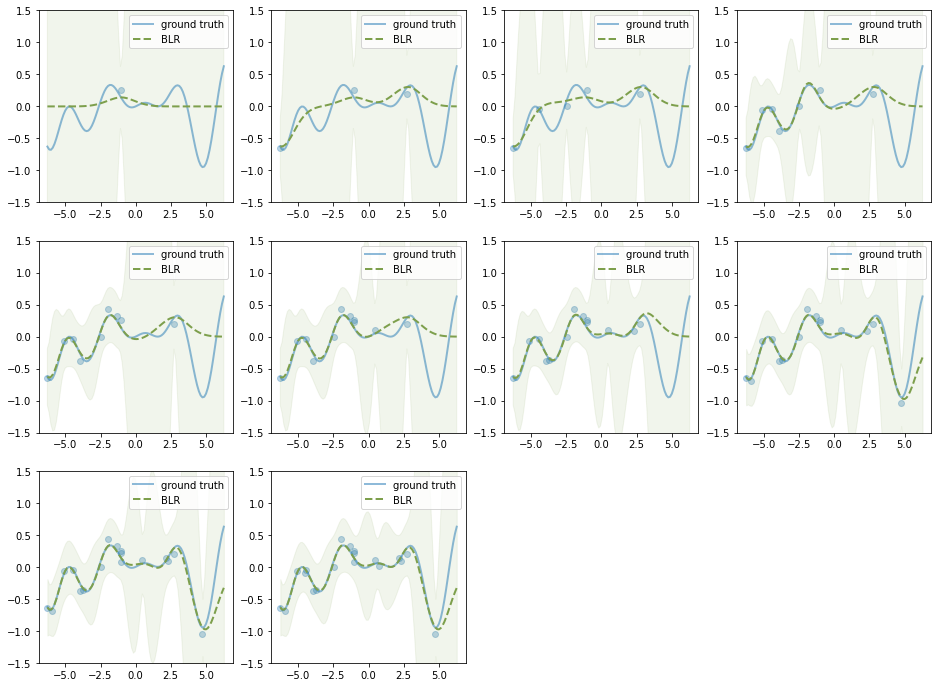

In [301]:
np.random.seed(seed=1)
N = 20
train_x = 2.0 * np.pi * (2*np.random.rand(N)-1)
noise = np.random.normal(0, 0.1, N)
target = lambda x: 0.1 * x * (np.sin(x) + np.cos(2*x))
fig = plt.figure(figsize=(16,12))

for n in range(1, N//2 + 1):
    ax = fig.add_subplot(3, 4, n)
    x = train_x[:2*n-1]
    y = target(x)
    ax.scatter(x, y+noise[:2*n-1], alpha=0.3)

    train = Train(targets=y, inputs=x)
    inference = Inference("bayesian", train=train)
    inference.likelihood.model = 'gaussian'
    inference.likelihood.param = {"mean": 0, "cov": 10}

    inference.prior_distribution.model = 'gaussian'
    inference.prior_distribution.param = {"mean": 0, "cov": 1}

    # inference.features = [lambda x: 1, lambda x: x, lambda x: x**2, lambda x: np.sin(x), lambda x: np.cos(x)]
    inference.features = [ (lambda n: lambda x: 5*np.exp(-(x-n)**2))(n) for n in range(-7,7) ]
    # print(f"design matrix:\n {inference.design_matrix}")

    rg = LinearRegression(inference=inference)
    x = 2.0 * np.pi * np.linspace(-1, 1, 100)
    # y = rg.regression(x)
    y, var = rg.regression(x)

    ax.plot(x, fn(x), alpha=0.5, label="ground truth", linewidth=2)

    ax.plot(x, y, label="BLR", c="#7d9f4c", linestyle="--", linewidth=2)
    # plt.plot(x, y + np.sqrt(var), alpha=0.5)
    # plt.plot(x, y - np.sqrt(var), alpha=0.5)
    ax.fill_between(x, y + np.sqrt(var), y - np.sqrt(var), alpha=0.1, color="#7d9f4c")
    ax.set_ylim(-1.5, 1.5)
    ax.legend()
    
plt.show()

# Gaussian process

## Conditional normal distribution

Consider the normal distribution $\Normal(x \mid \mu, \Sigma)$ where $x$ and means $\mu$ are $D$-dimensional vectors and $\Sigma$ is the covariant matrix.
Here we consider the splitting $x = (x_{1}, x_{2}, \cdots, x_{D})$ to $x_{a} = (x_{1}, \cdots, x_{M})$ and
$x_{b} = (x_{1}, \cdots, x_{D-M})$. Similary, the means and covariance matrix is splitted by
$$
  \mu = (\mu_{a}, \mu_{b}),
  \quad
  \Sigma = \begin{pmatrix}
    \Sigma_{aa} & \Sigma_{ab} \\
    \Sigma_{ba} & \Sigma_{bb}
  \end{pmatrix},
  \quad
  \Sigma^{-1} = \begin{pmatrix}
    \Lambda_{aa} & \Lambda_{ab} \\
    \Lambda_{ba} & \Lambda_{bb}
  \end{pmatrix},
$$
and the precision matrix $\Lambda = \Sigma^{-1}$ is introduced.
Use the completing the square
$$
  x^{T} A x + B^{T} x + x^{T} B = (x + A^{-1} B)^{T} A (x + A^{-1} B) - B^{T} A^{-1} B,
$$
we have
$$
\begin{aligned}
  \Normal(x | \mu, \Sigma)
  &= \frac{1}{(2\pi)^{D/2}} \frac{1}{\sqrt{\det \Sigma}} \exp\Big\{ -\frac{1}{2} (x - \mu)^{T} \Sigma^{-1} (x - \mu) \Big\}
  \\ &= \frac{1}{(2\pi)^{D/2}} \frac{1}{\sqrt{\det \Sigma_{a|b}}} \frac{1}{\sqrt{\det \Sigma_{bb}}} \exp\Big\{ -\frac{1}{2} (x_{a} - \mu_{a|b})^{T} \Sigma^{-1}_{a|b} (x_{a} - \mu_{a|b}) -\frac{1}{2} (x_{b} - \mu_{b})^{T} \Sigma^{-1}_{bb} (x_{b} - \mu_{b}) \Big\}
\end{aligned}
$$
so that the joint normal distribution can split the conditional and prior's one,
$$
  \Normal(x_{a}, x_{b} | \mu, \Sigma) = \Normal(x_{a} | \mu_{a|b}, \Sigma_{a|b}) \Normal(x_{b} | \mu_{b}, \Sigma_{bb})
$$
where we define
$$
\begin{aligned}
  \mu_{a|b} &\equiv \mu_{a} + \Sigma_{ab} \Sigma^{-1}_{bb} (x_{b} - \mu_{b}), \\
  \Sigma_{a|b} &\equiv \Sigma_{aa} - \Sigma_{ab} \Sigma^{-1}_{bb} \Sigma_{ba},
\end{aligned}
$$
and the inverse
$$
  \begin{pmatrix}
    A & B \\
    C & D
  \end{pmatrix}^{-1}
  = \begin{pmatrix}
    M & -M B D^{-1} \\
    -D^{-1} C M & D^{-1} + D^{-1} C M B D^{-1}
  \end{pmatrix}
$$
where $M = (A - B D^{-1} C)^{-1}$ is Schur complement matrix, and the determinant of block matrix
$$
  \det \begin{pmatrix}
    A & B \\
    C & D
  \end{pmatrix}
  = \det M^{-1} \det D
$$
Integrate out w.r.t. $x_{b}$, we obtain
$$
  \int dx_{b} \Normal(x_{a}, x_{b} | \mu, \Sigma) = \frac{1}{(2\pi)^{M/2}} \frac{1}{\sqrt{\det \Sigma_{aa}}}
  \exp \Big\{-\frac{1}{2} (x_{a} - \mu_{a})^{T} \Sigma_{aa}^{-1} (x_{a} - \mu_{a}) \Big\}
  = \Normal(x_{a} | \mu_{a}, \Sigma_{aa})
$$

## Kernel trick

Let us reconsider the linear regression
$$
  y = w_{i} \phi_{i}(x),
$$
where $\phi_{i}(x)$ is the feature function. If $N$ data set, $D=\{(x_{0}, y_{0}), (x_{1}, y_{1}), \cdots, (x_{N}, y_{N})\}$ is obtained, we have
$$
  y_{n} = w_{i} \phi_{i}(x_{n}) \equiv w_{i} \Phi_{in},
$$
where $\Phi_{in}$ is the design matrix.

In [137]:
def rbf(x, y, alpha=1, beta=1):
    z = x - y
    return alpha * np.exp(-beta**(-1) * z**2)

def toarray(value):
    if (s:= np.shape(value)) == ():
        return np.array([value])
    else:
        return np.array(value).reshape(s)

def kernel(x, y, model="rbf", *args):
    model = rbf
    # cast, (int, float, list) -> np.array
    x, y = list(map(toarray, [x, y]))

    row, column = len(x), len(y)
    K = np.empty([row, column])
    for i in range(row):
        for j in range(column):
            K[i][j] = model(x[i], y[j], *args)

    return K


In [135]:
kernel([1, 2, 3], [1, 2, 3])

array([[2.        , 1.21306132, 0.27067057],
       [1.21306132, 2.        , 1.21306132],
       [0.27067057, 1.21306132, 2.        ]])

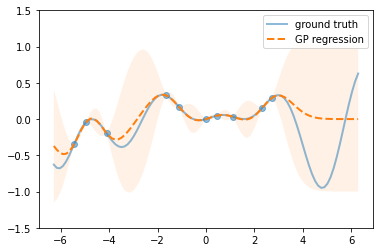

In [263]:
from dataclasses import dataclass, field
from collections.abc import Sequence
from numbers import Number
import numpy as np


@dataclass
class Train:
    inputs: list = field(default_factory=list)
    targets: list = field(default_factory=list)

class LinearRegression():
    def __init__(self, model: str, train: Train, **kwargs):
        self.model = model
        self.train = train
        self.noiseMean, self.noiseVar = kwargs.pop("noise", (0.0, 0.0)) # noise=(1, 1)

    def regression(self, x):
        if self.model == "gaussian":
            z = self.train.inputs
            fz = self.train.targets
            kxz = kernel(x, z)
            kzz = kernel(z, z)
            Lambda = np.linalg.inv(kzz + self.noiseVar ** 2 * np.eye(len(z))) # precision matrix, O(N^3)
            mean = kxz @ Lambda @ fz
            cov = kernel(x, x) - kxz @ Lambda @ kxz.T
            return mean, cov



if __name__ == '__main__':
    import matplotlib.pyplot as plt

    np.random.seed(seed=72)
    x = 2.0 * np.pi * np.sort(2*np.random.rand(10)-1)
    fn = lambda x: 0.1 * x * (np.sin(x) + np.cos(2*x))
    y = fn(x)
    # plt.scatter(x, y+np.random.normal(0, 0.2, len(x)), alpha=0.5)
    plt.scatter(x, y, alpha=0.5)

    rg = LinearRegression(model="gaussian", train=Train(inputs=x, targets=y))
    x = 2.0 * np.pi * np.linspace(-1, 1, 100)
    # y = rg.regression(x)
    y, cov = rg.regression(x)
    var = np.diag(cov)

    plt.plot(x, fn(x), alpha=0.5, label="ground truth", linewidth=2)

    plt.plot(x, y, label="GP regression", linestyle="--", linewidth=2)
    # plt.plot(x, y + np.sqrt(var), alpha=0.5)
    # plt.plot(x, y - np.sqrt(var), alpha=0.5)

    plt.fill_between(x, y + np.sqrt(var), y - np.sqrt(var), alpha=0.1)
    # plt.fill_between(x, y + 2*np.sqrt(var), y - 2*np.sqrt(var), alpha=0.1)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.show()
    # print(np.diag(var))

In [287]:
for i in range(1, 10, 2):
    print(i)

1
3
5
7
9


# Bayesian optimization